## Importing important libraries

In [13]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing ML libraries
import statsmodels.api as sm # to build LR model using statsmodels api
from sklearn.linear_model import LinearRegression # to build LR model using sklearn api
from sklearn.model_selection import train_test_split # for splitting the data into train and test df's
from sklearn.preprocessing import MinMaxScaler # for scaling the data
from sklearn.feature_selection import RFE # for feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor # for checking the VIF's
from sklearn.metrics import mean_squared_error, r2_score # for Rsquared value
import scipy.stats as stats

# disable the warning
import warnings
warnings.filterwarnings('ignore')
 
# display upto 2 decimals
pd.options.display.float_format = "{:,.2f}".format

# display all the columns in a dataframe
pd.options.display.max_columns = None

In [14]:
# reading the data
data = pd.read_csv('day.csv')

# 1. Data Understanding and Visualisation

## 1.1 Data Understanding

In [15]:
# inspecting the data
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [16]:
# checking the data shape
data.shape

(730, 16)

In [17]:
# checking datatypes and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no null values in the dataset

In [18]:
# describing the data
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,"3,658.76","4,508.01"
std,210.88,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,"1,559.76","1,936.01"
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,"2,502.25","3,169.75"
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,"3,664.50","4,548.50"
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,"1,096.50","4,783.25","5,966.00"
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,"3,410.00","6,946.00","8,714.00"


### Updating the categorical columns with logical values and keeping binary columns as it is

In [19]:
# setting the index
data.set_index('instant', inplace=True)

In [20]:
# updating categorical columns with logical values

data['season'] = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

data['mnth'] = data.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug'\
              , 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

data['weekday'] = data.weekday.map({1:'mon', 2:'tue', 3:'wed', 4:'thur', 5:'fri', 6:'sat', 0:'sun'})

data['weathersit'] = data.weathersit.map({1:'clear', 2:'misty', 3:'light snow/rain', 4:'heavy snow/rain'})

## 1.2 Data Visualisation

### Plotting categorical variables against registered , casual users and total users to analyze the data as this will give more insights about different segment of users.

In [21]:
# preparing dataframes to plot categorical variables
season_df = pd.pivot_table(data, values=['casual', 'registered', 'cnt'] ,index=['season'], aggfunc=np.sum).sort_values(by=['cnt', 'registered'])

month_df = pd.pivot_table(data, values=['casual', 'registered', 'cnt'] ,index=['mnth'], aggfunc=np.sum).sort_values(by=['cnt', 'registered'])

weekday_df = pd.pivot_table(data, values=['casual', 'registered', 'cnt'] ,index=['weekday'], aggfunc=np.sum).sort_values(by=['cnt', 'registered'])

weathersit_df = pd.pivot_table(data, values=['casual', 'registered', 'cnt'] ,index=['weathersit'], aggfunc=np.sum).sort_values(by=['cnt','registered'])

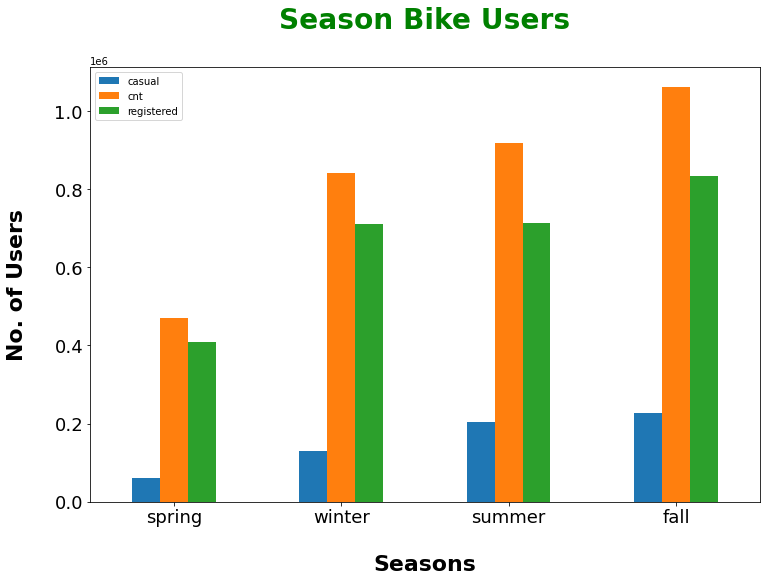

In [22]:
# plotting seasons for casual & registered users count

season_df.plot.bar(figsize=(12,8))
plt.title('Season Bike Users\n', fontsize=28, fontweight='bold', color='green')
plt.xlabel('\nSeasons', fontsize=22, fontweight='bold')
plt.ylabel('No. of Users\n', fontsize=22, fontweight='bold')

plt.yticks(fontsize=18); plt.xticks(rotation=0, fontsize=18)
plt.show()

Seasons plot shows that fall season attracts the highest number of registered users but the casual users counts is only marginally higher than in summer. Registered users count is approx. same in winter & summer seasons, and its lowest in spring season.

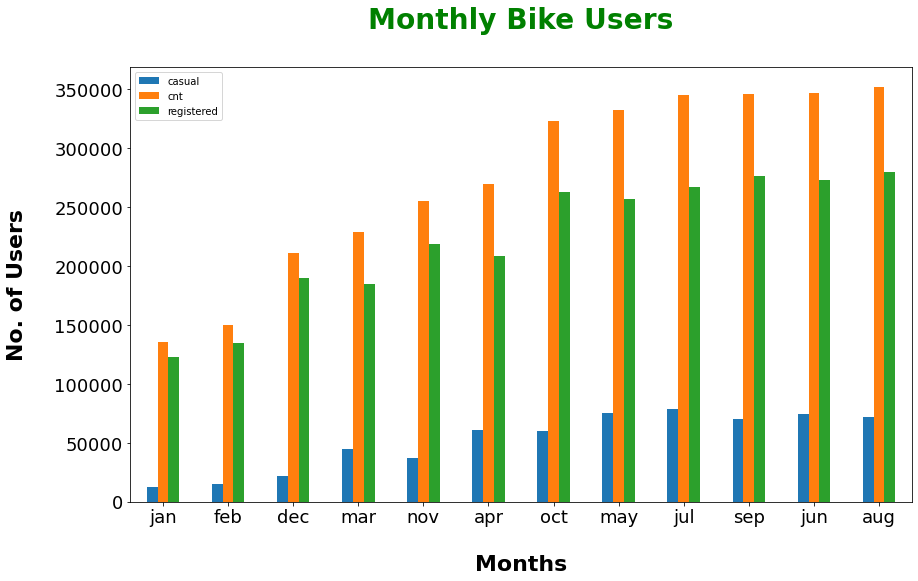

In [23]:
# plotting months for casual & registered users count

month_df.plot.bar(figsize=(14,8))
plt.title('Monthly Bike Users\n', fontsize=28, fontweight='bold', color='green')
plt.xlabel('\nMonths', fontsize=22, fontweight='bold')
plt.ylabel('No. of Users\n', fontsize=22, fontweight='bold')

plt.yticks(fontsize=18); plt.xticks(rotation=0, fontsize=18)
plt.show()

Monthly plot shows that the registered users count start decreasing from the month of November and increases April onwards whereas casual users count is approx same from the month May to October and there are sudden peaks in the month of March & April and its declined in coldest months.

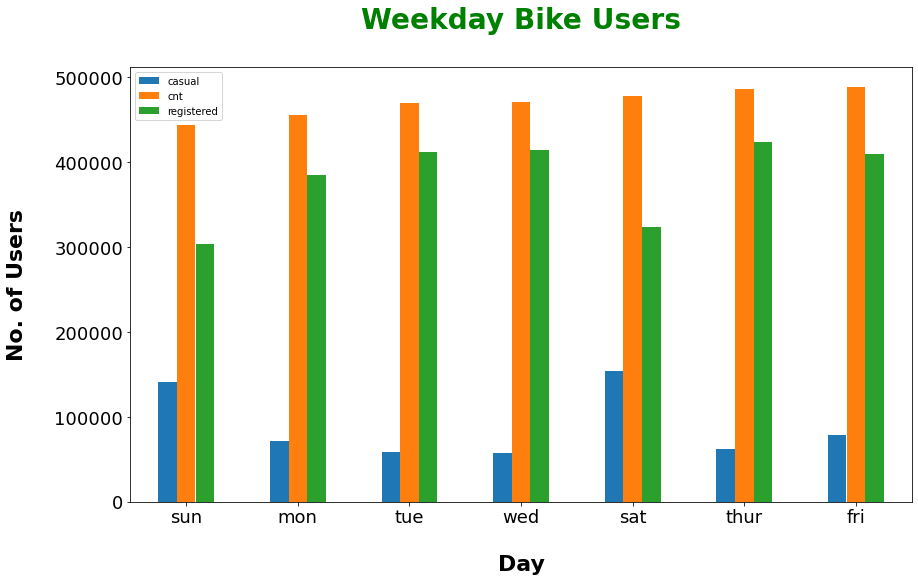

In [24]:
# plotting weekdays for casual & registered users count

weekday_df.plot.bar(figsize=(14,8))
plt.title('Weekday Bike Users\n', fontsize=28, fontweight='bold', color='green')
plt.xlabel('\nDay', fontsize=22, fontweight='bold')
plt.ylabel('No. of Users\n', fontsize=22, fontweight='bold')

plt.yticks(fontsize=18); plt.xticks(rotation=0, fontsize=18)
plt.show()

Weekday plot shows that registered users have highest usage during weekdays and casual users have lowest usage during that time. But during weekends, it becomes the opposite.

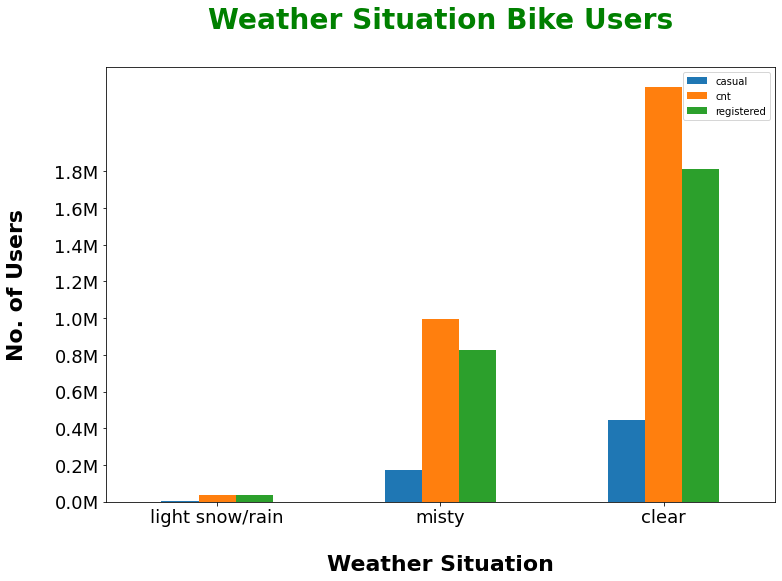

In [25]:
# plotting weather situations for casual & registered users count

weathersit_df.plot.bar(figsize=(12,8))
plt.title('Weather Situation Bike Users\n', fontsize=28, fontweight='bold', color='green')
plt.xlabel('\nWeather Situation', fontsize=22, fontweight='bold')
plt.ylabel('No. of Users\n', fontsize=22, fontweight='bold')

ticks = np.arange(0, 2000000, 200000)
labels = [f'{i/10**6}M' for i in ticks]
plt.yticks(ticks, labels, fontsize=18); plt.xticks(rotation=0, fontsize=18)
plt.show()

Weather situation plot shows that clear weather attracts the most users.

### Plotting binary variables against registered and casual users to analyze the data

In [26]:
# preparing dataframes to plot binary variables

# using sum as an aggregate function 
year_df = pd.pivot_table(data, values=['casual', 'registered', 'cnt'] ,index=['yr'], aggfunc=np.sum).sort_values(by=['cnt', 'registered'])

# using mean as an aggregate function as it will provide good insight
holiday_df = pd.pivot_table(data, values=['casual', 'registered', 'cnt'] ,index=['holiday'], aggfunc=np.mean).sort_values(by=['cnt', 'registered'])

# using mean as an aggregate function as it will provide good insight
workingday_df = pd.pivot_table(data, values=['casual', 'registered', 'cnt'] ,index=['workingday'], aggfunc=np.mean).sort_values(by=['cnt', 'registered'])


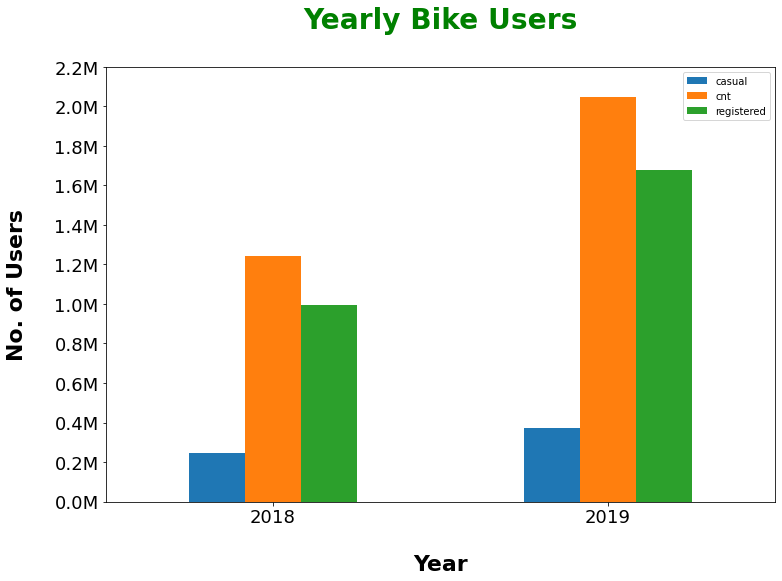

In [27]:
# plotting Yearly casual & registered users count

year_df.plot.bar(figsize=(12,8))
plt.title('Yearly Bike Users\n', fontsize=28, fontweight='bold', color='green')
plt.xlabel('\nYear', fontsize=22, fontweight='bold')
plt.ylabel('No. of Users\n', fontsize=22, fontweight='bold')

ticks = np.arange(0, 2400000, 200000)
labels = [f'{i/10**6}M' for i in ticks]
plt.yticks(ticks, labels, fontsize=18); plt.xticks(ticks=[0, 1], labels=['2018','2019'], rotation=0, fontsize=18)
plt.show()

Yearly plot shows rise of registered & casual users from year 2018 to 2019.

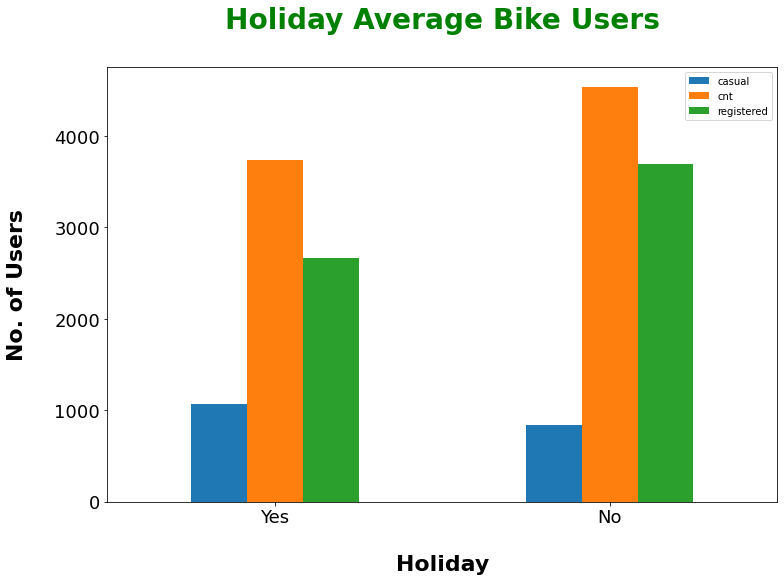

In [28]:
# plotting casual & registered users count during holidays

holiday_df.plot.bar(figsize=(12,8))
plt.title( 'Holiday Average Bike Users\n', fontsize=28, fontweight='bold', color='green')
plt.xlabel('\nHoliday', fontsize=22, fontweight='bold')
plt.ylabel('No. of Users\n', fontsize=22, fontweight='bold')

plt.yticks(fontsize=18); plt.xticks(ticks=[0, 1], labels=['Yes','No'], rotation=0, fontsize=18)
plt.show()

Holiday average plot shows that casual users increase during holiday but the registered users decrese during that time.

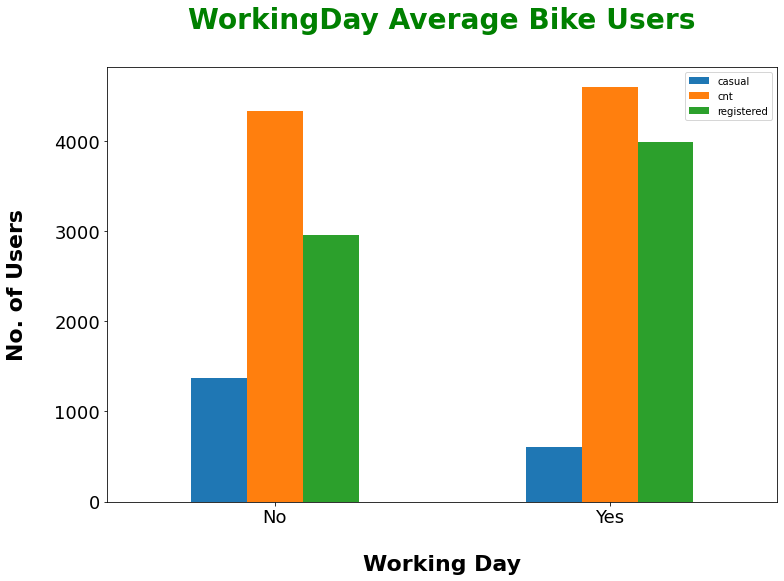

In [29]:
# plotting months for casual & registered users count

workingday_df.plot.bar(figsize=(12,8))
plt.title('WorkingDay Average Bike Users\n', fontsize=28, fontweight='bold', color='green')
plt.xlabel('\nWorking Day', fontsize=22, fontweight='bold')
plt.ylabel('No. of Users\n', fontsize=22, fontweight='bold')

plt.yticks(fontsize=18); plt.xticks(ticks=[0, 1], labels=['No','Yes'], rotation=0, fontsize=18)
plt.show()

Working day plot shows that registerd users are more during working days but casual users doubles during non working days.

### Plotting boxplots to check the count range of registered and casual users

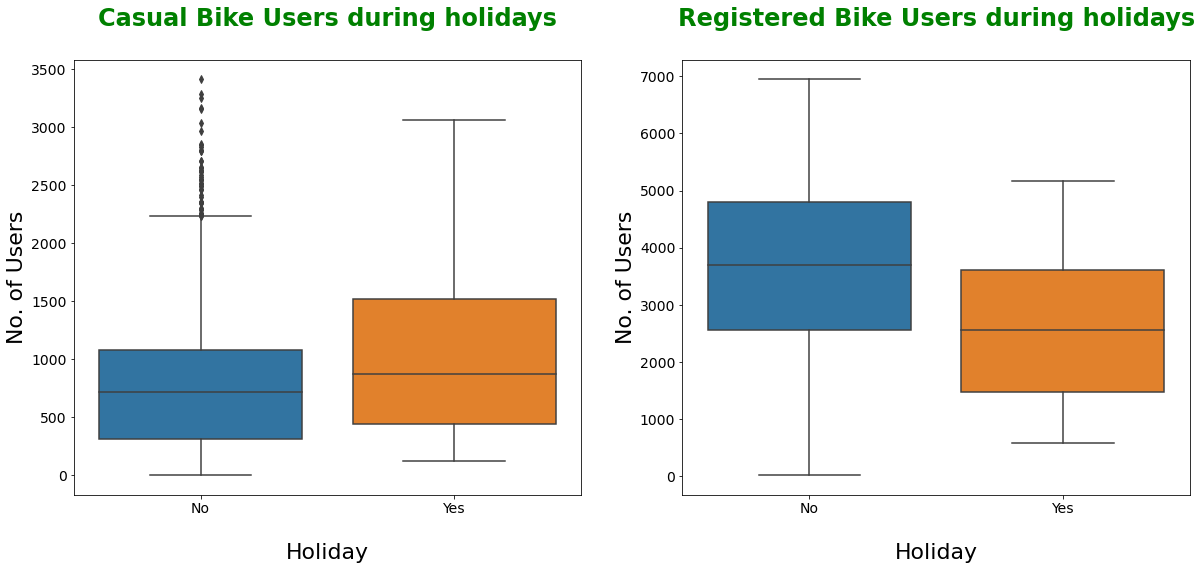

In [30]:
# plotting boxplots of casual & registered bike users during holidays

plt.figure(figsize=(20,8))

# plotting subplot to plot Casual Bike Users during holidays
plt.subplot(121)
sns.boxplot(x='holiday', y='casual',data=data)
plt.xticks(ticks=[0, 1], labels=['No','Yes'], fontsize=14)
plt.yticks(fontsize=14)
plt.title('Casual Bike Users during holidays\n', fontsize=24, fontweight='bold', color='green')
plt.xlabel('\nHoliday', fontsize=22)
plt.ylabel('No. of Users', fontsize=22)

# plotting subplot to plot Casual Bike Users during holidays
plt.subplot(122)
sns.boxplot(x='holiday', y='registered',data=data)
plt.xticks(ticks=[0, 1], labels=['No','Yes'], fontsize=14)
plt.yticks(fontsize=14)
plt.title('Registered Bike Users during holidays\n', fontsize=24, fontweight='bold', color='green')
plt.xlabel('\nHoliday', fontsize=22)
plt.ylabel('No. of Users', fontsize=22)

plt.show()

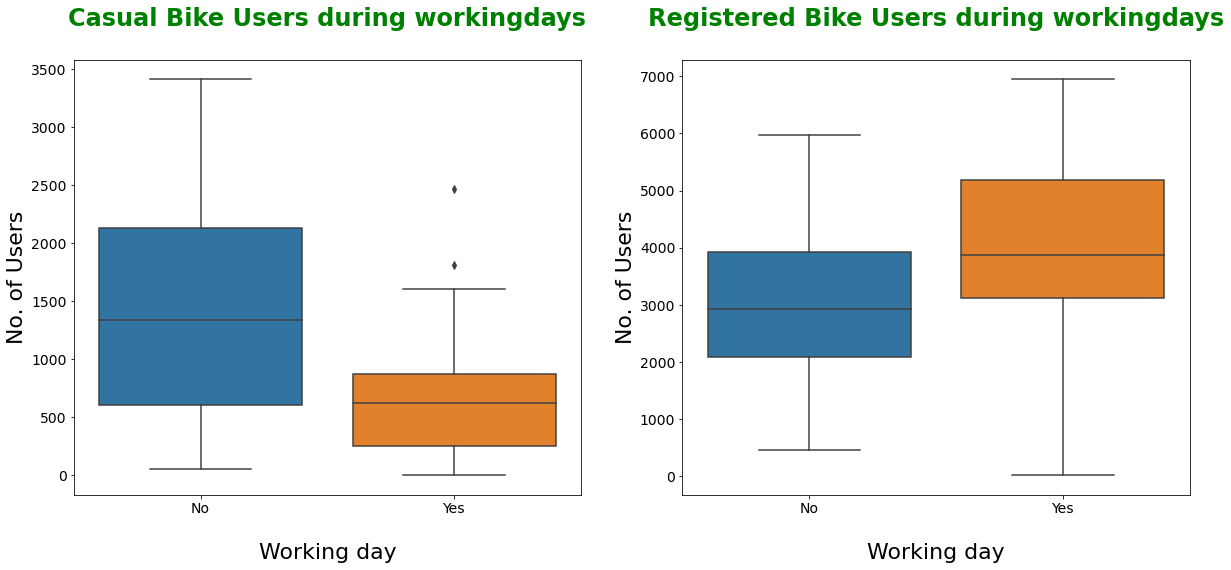

In [31]:
# plotting boxplots of casual & registered bike users during workingdays

plt.figure(figsize=(20,8))

# plotting subplot to plot Casual Bike Users during workingdays
plt.subplot(121)
sns.boxplot(x='workingday', y='casual',data=data)
plt.xticks(ticks=[0, 1], labels=['No','Yes'], fontsize=14)
plt.yticks(fontsize=14)
plt.title('Casual Bike Users during workingdays\n', fontsize=24, fontweight='bold', color='green')
plt.xlabel('\nWorking day', fontsize=22)
plt.ylabel('No. of Users', fontsize=22)

# plotting subplot to plot Registered Bike Users during workingdays
plt.subplot(122)
sns.boxplot(x='workingday', y='registered',data=data)
plt.xticks(ticks=[0, 1], labels=['No','Yes'], fontsize=14)
plt.yticks(fontsize=14)
plt.title('Registered Bike Users during workingdays\n', fontsize=24, fontweight='bold', color='green')
plt.xlabel('\nWorking day', fontsize=22)
plt.ylabel('No. of Users', fontsize=22)

plt.show()

### Plotting heatmap and pairplot to check the correlation between all the variables

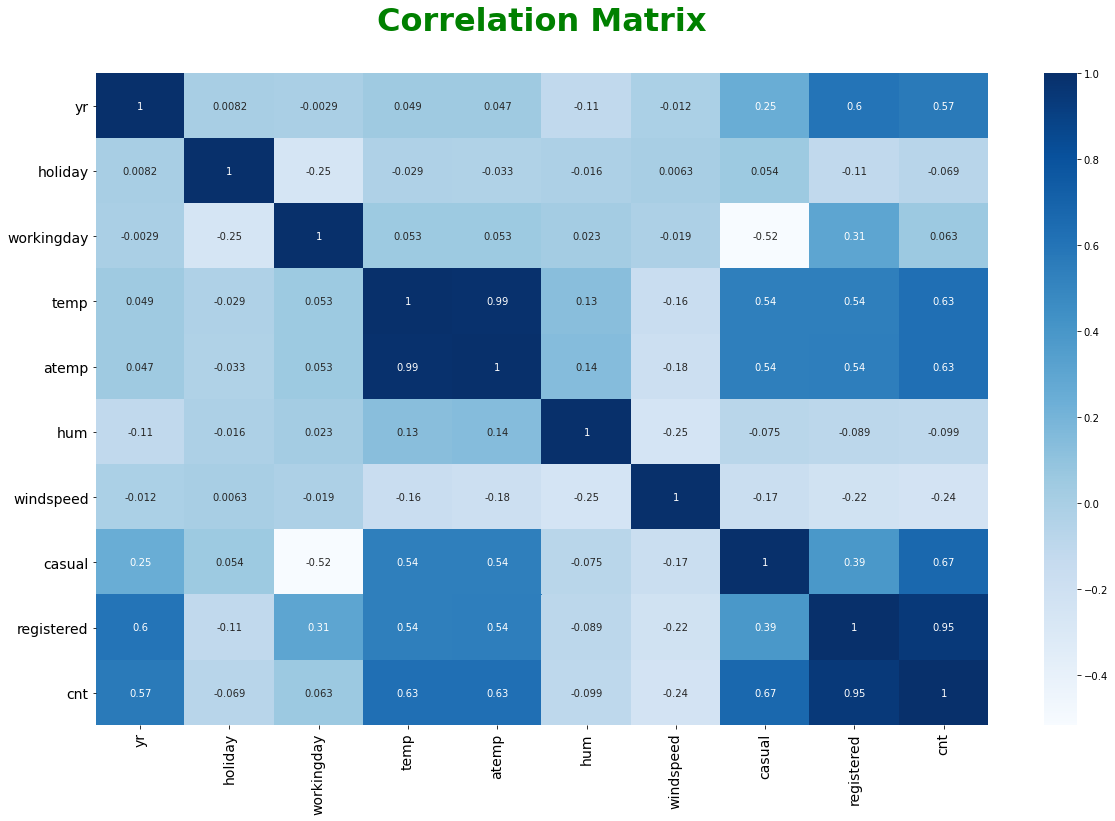

In [32]:
# plotting heatmap to check the correlation
plt.figure(figsize=(20,12))

sns.heatmap(data.corr(),annot=True, cmap='Blues')
plt.title('Correlation Matrix\n', fontsize=32, fontweight='bold', color='green')
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=0, fontsize=14)

plt.show()

Correlation matrix shows strong correlation between many variables like cnt-registered,temp-atemp,cnt-yr, etc

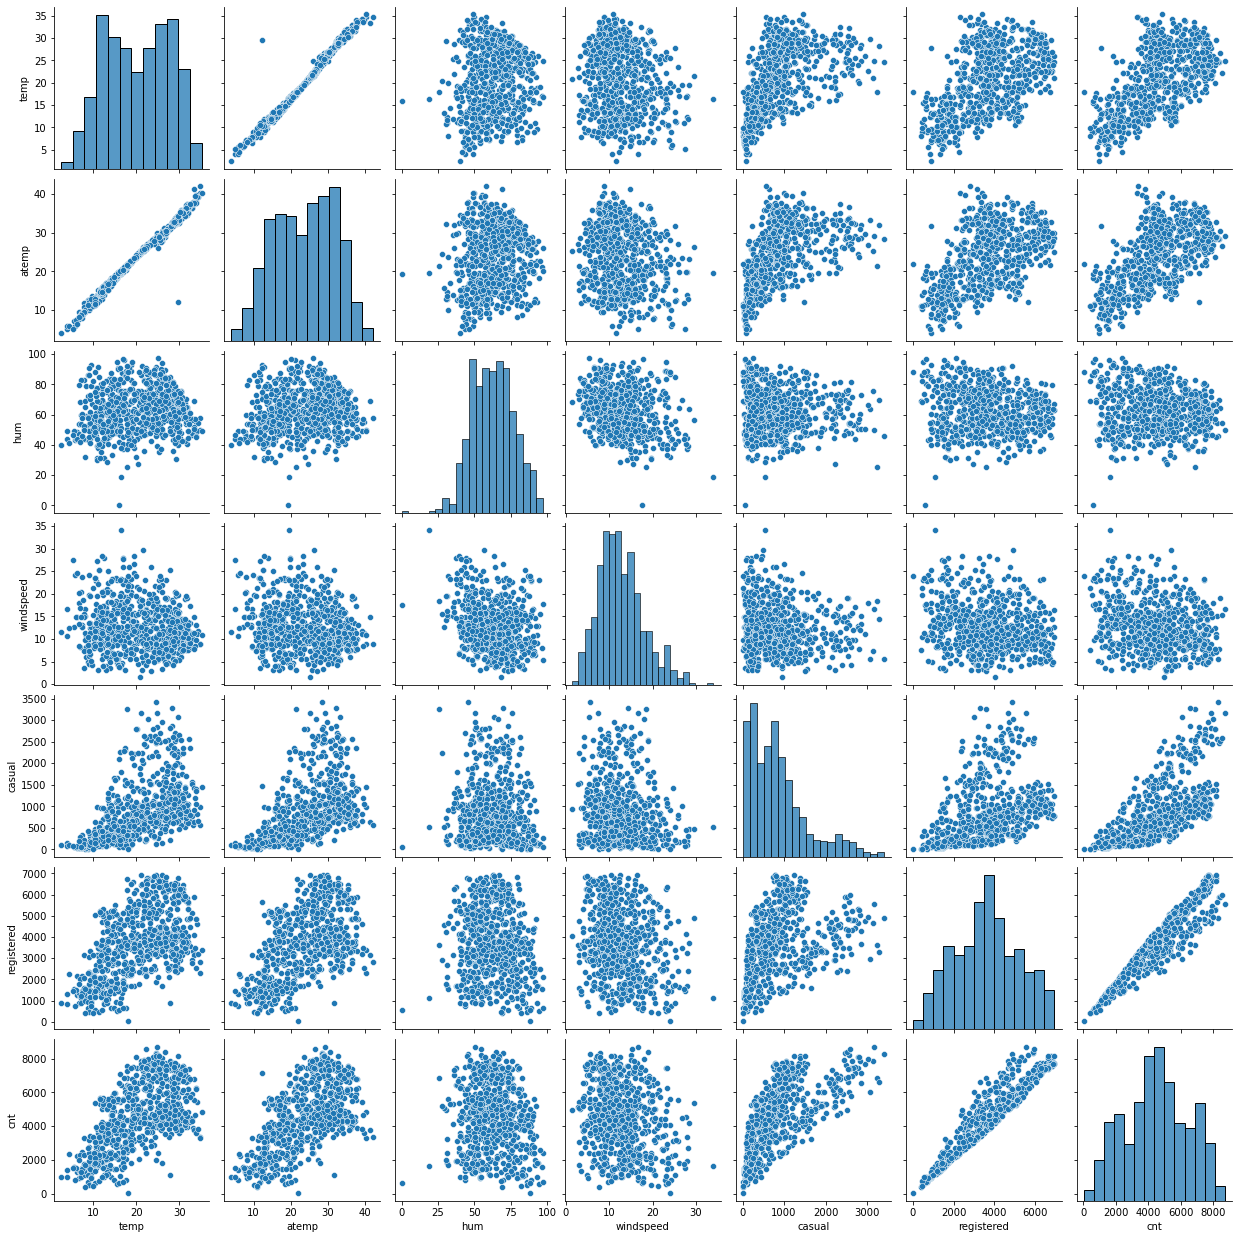

In [33]:
# To visualise the numerical data relationship as we have already seen the categorical & binary data relationship

sns.pairplot(data[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
plt.show()

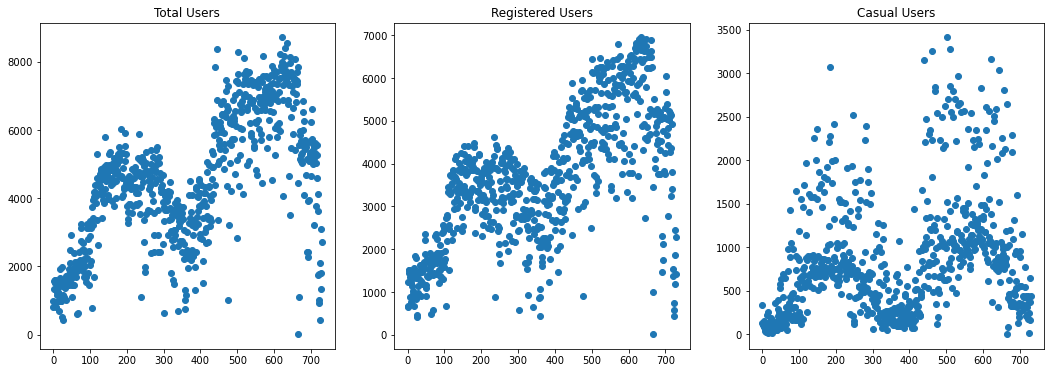

In [34]:
# To show every day count of total users 
plt.figure(figsize=(18,6))

plt.subplot(131)
plt.scatter(np.arange(len(data['cnt'].index)),data['cnt'])
plt.title('Total Users')

plt.subplot(132)
plt.scatter(np.arange(len(data['registered'].index)),data['registered'])
plt.title('Registered Users')

plt.subplot(133)
plt.scatter(np.arange(len(data['casual'].index)),data['casual'])
plt.title('Casual Users')

plt.show()

The above plot shows the trend of users for two years. You can observe that first half of the chart is almost exactly like the second half but second half is little upscaled. This means that yearly trend remained the same, but the volumne of the users rose yearly.

# 2. Data Preparation

## 2.1 Creating dummy variables of categorical variables

In [35]:
# since the categorical variables are 'season', 'mnth', 'weekday', 'weathersit', let's create dummy variables df

data_dummies_df = pd.get_dummies(data[['season', 'mnth', 'weekday', 'weathersit']], drop_first=True)

In [36]:
# concatenating dummy variables dataframe with main dataframe

data = pd.concat([data, data_dummies_df], axis=1)

In [37]:
# inspecting the data after concatenation

data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_light snow/rain,weathersit_misty
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,jan,0,sat,0,misty,14.11,18.18,80.58,10.75,331,654,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,02-01-2018,spring,0,jan,0,sun,0,misty,14.90,17.69,69.61,16.65,131,670,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,03-01-2018,spring,0,jan,0,mon,1,clear,8.05,9.47,43.73,16.64,120,1229,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,04-01-2018,spring,0,jan,0,tue,1,clear,8.20,10.61,59.04,10.74,108,1454,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,05-01-2018,spring,0,jan,0,wed,1,clear,9.31,11.46,43.70,12.52,82,1518,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
# dropping the categorical data columns after creating their dummy variables

data = data.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)

In [39]:
# dropping date column 'dteday' as we already have all the features that we can get from this column

data = data.drop('dteday', axis=1)

In [40]:
# inspecting the data after dropping the categorical and date columns

data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_light snow/rain,weathersit_misty
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.11,18.18,80.58,10.75,331,654,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,14.90,17.69,69.61,16.65,131,670,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,1,8.05,9.47,43.73,16.64,120,1229,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,8.20,10.61,59.04,10.74,108,1454,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,1,9.31,11.46,43.70,12.52,82,1518,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
data.shape

(730, 32)

After creating the dummy variables for all the categorical variables and dropping the categorical data columns, we now have total 32 columns which we are going to use to build our model.

## 2.2 Dividing the data to test and train dataframes

In [42]:
# splitting the data into train and test dataframes using sklearn.model_selection.train_test_split method

train_df, test_df = train_test_split(data, train_size=0.7, test_size=0.3, random_state=10)

In [43]:
# checking shapes after splitting the data

print(f'Train data shape : {train_df.shape}')
print(f'Test data shape : {test_df.shape}')

Train data shape : (510, 32)
Test data shape : (219, 32)


## 2.3 Rescaling the features

In [44]:
# using sklearn.preprocessing.MinMaxScaler for rescaling the features columns except the binary and dummy variables

scaler = MinMaxScaler()

In [45]:
# applying scaler to all the features columns except the binary and dummy variables

feat_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

train_df[feat_vars] = scaler.fit_transform(train_df[feat_vars])

In [46]:
# inspecting the rescaled train dataframe

train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_light snow/rain,weathersit_misty
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
324,0,0,0,0.48,0.48,0.63,0.34,0.23,0.35,0.37,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
73,0,0,1,0.30,0.31,0.39,0.24,0.10,0.19,0.19,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
511,1,0,0,0.78,0.73,0.70,0.36,0.84,0.50,0.74,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
701,1,0,0,0.33,0.35,0.81,0.21,0.26,0.51,0.51,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
265,0,0,1,0.69,0.61,0.91,0.22,0.16,0.59,0.53,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [47]:
# describing the data to check if the columns are correctly scaled and all the columns have same scaling

train_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_light snow/rain,weathersit_misty
count,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00
mean,0.51,0.03,0.69,0.51,0.50,0.56,0.34,0.24,0.50,0.49,0.25,0.26,0.26,0.08,0.09,0.08,0.09,0.07,0.07,0.08,0.09,0.09,0.08,0.09,0.15,0.15,0.13,0.14,0.15,0.15,0.03,0.35
std,0.50,0.18,0.46,0.23,0.21,0.18,0.16,0.20,0.24,0.24,0.43,0.44,0.44,0.27,0.29,0.27,0.28,0.25,0.26,0.28,0.28,0.29,0.28,0.29,0.35,0.35,0.34,0.34,0.36,0.36,0.18,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.31,0.32,0.43,0.23,0.09,0.32,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,1.00,0.51,0.50,0.56,0.32,0.20,0.50,0.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,0.72,0.67,0.70,0.43,0.32,0.68,0.68,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [48]:
# checking the correlation after creating dummy variables and rescaling

train_df.corr()

# we can plot the heatmap, but with so many columns it will not be easy to actually visualise the data

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_light snow/rain,weathersit_misty
yr,1.00,0.01,-0.01,0.03,0.04,-0.16,-0.01,0.25,0.61,0.58,0.00,-0.04,0.04,0.00,-0.03,0.03,-0.02,-0.01,0.03,-0.01,-0.06,0.02,0.06,-0.00,-0.02,0.01,-0.00,0.01,-0.01,0.02,-0.10,-0.00
holiday,0.01,1.00,-0.28,-0.04,-0.05,-0.04,0.04,0.03,-0.13,-0.09,0.05,-0.03,0.01,-0.05,0.01,0.03,0.02,0.04,-0.05,-0.06,-0.02,0.09,-0.02,-0.02,0.26,-0.08,-0.07,-0.01,-0.05,-0.05,-0.03,-0.02
workingday,-0.01,-0.28,1.00,0.05,0.06,0.03,-0.06,-0.52,0.28,0.04,-0.03,0.03,-0.02,0.03,-0.02,-0.01,-0.02,0.02,0.03,0.05,0.01,-0.02,0.01,-0.04,0.15,-0.62,-0.58,0.24,0.27,0.27,0.05,0.04
temp,0.03,-0.04,0.05,1.00,1.00,0.15,-0.17,0.52,0.53,0.61,-0.61,0.16,-0.21,0.36,-0.29,-0.30,-0.42,0.41,0.31,-0.18,0.17,-0.20,0.01,0.24,-0.02,-0.03,-0.02,0.04,0.01,0.04,-0.07,-0.09
atemp,0.04,-0.05,0.06,1.00,1.00,0.16,-0.20,0.53,0.54,0.62,-0.61,0.16,-0.19,0.35,-0.28,-0.30,-0.43,0.41,0.30,-0.18,0.17,-0.19,0.02,0.23,-0.02,-0.03,-0.02,0.03,0.02,0.04,-0.08,-0.09
hum,-0.16,-0.04,0.03,0.15,0.16,1.00,-0.26,-0.08,-0.12,-0.12,-0.19,-0.01,0.16,0.02,0.08,-0.15,-0.08,-0.05,-0.10,-0.09,0.13,0.00,0.11,0.20,0.02,-0.03,0.02,-0.02,0.02,0.05,0.34,0.47
windspeed,-0.01,0.04,-0.06,-0.17,-0.20,-0.26,1.00,-0.17,-0.23,-0.25,0.19,0.05,-0.13,-0.05,-0.06,0.15,0.06,-0.12,-0.04,0.10,-0.05,-0.00,-0.07,-0.08,-0.02,0.07,-0.00,-0.06,0.01,-0.01,0.10,-0.04
casual,0.25,0.03,-0.52,0.52,0.53,-0.08,-0.17,1.00,0.40,0.67,-0.41,0.20,-0.07,0.13,-0.22,-0.24,-0.29,0.16,0.15,-0.05,0.14,-0.09,0.07,0.18,-0.13,0.39,0.29,-0.15,-0.18,-0.16,-0.19,-0.15
registered,0.61,-0.13,0.28,0.53,0.54,-0.12,-0.23,0.40,1.00,0.95,-0.50,0.06,0.15,0.17,-0.14,-0.21,-0.34,0.12,0.17,-0.12,0.06,-0.01,0.17,0.18,-0.04,-0.14,-0.17,0.11,0.08,0.10,-0.23,-0.12
cnt,0.58,-0.09,0.04,0.61,0.62,-0.12,-0.25,0.67,0.95,1.00,-0.55,0.12,0.10,0.18,-0.19,-0.25,-0.37,0.15,0.19,-0.11,0.10,-0.04,0.16,0.20,-0.08,0.03,-0.04,0.04,0.00,0.03,-0.25,-0.15


## 2.4 Divide the data into X and y sets for model building

In [49]:
# dividing the data into independent (X_train) and target (y_train) variables dataframes for model building

y_train = train_df.pop('cnt')
X_train = train_df

# 3. Data Modelling and Evaluation

## 3.1 Building RFE model
#### Using sklear linear regression model to build the model to run RFE (recursive feature elimination) to select the top 15 features

In [50]:
# building the model and runing RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

# running the RFE
rfe = RFE(lm, 15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [51]:
# to check the top 15 feature columns selected by RFE with their rankings

rfe_feature_df = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)),\
                              columns=['col', 'rfe_support', 'rfe_ranking' ])

rfe_feature_df.sort_values(by='rfe_ranking')

,col,rfe_support,rfe_ranking
0,yr,True,1
24,weekday_sat,True,1
20,mnth_nov,True,1
19,mnth_may,True,1
16,mnth_jul,True,1
29,weathersit_light snow/rain,True,1
13,mnth_dec,True,1
11,season_winter,True,1
30,weathersit_misty,True,1
3,temp,True,1


In [52]:
# storing the selected features to list

feature_15_rfe = rfe_feature_df[rfe_feature_df['rfe_support'] == True].col.to_list()

feature_15_rfe

['yr',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'casual',
 'registered',
 'season_winter',
 'mnth_dec',
 'mnth_jul',
 'mnth_may',
 'mnth_nov',
 'weekday_sat',
 'weathersit_light snow/rain',
 'weathersit_misty']

In [53]:
# not selected features

rfe_feature_df[rfe_feature_df['rfe_support'] == False].col.to_list()

['holiday',
 'windspeed',
 'season_spring',
 'season_summer',
 'mnth_aug',
 'mnth_feb',
 'mnth_jan',
 'mnth_jun',
 'mnth_mar',
 'mnth_oct',
 'mnth_sep',
 'weekday_mon',
 'weekday_sun',
 'weekday_thur',
 'weekday_tue',
 'weekday_wed']

## 3.2 Building the Linear regression model using statsmodels api for detailed analysis

### Model 1
#### We are going to follow top down approach to build our final model

In [54]:
# creating X train dataframe with 15 RFE selected features

X_train_rfe = X_train[feature_15_rfe]

# adding a constant using statsmodels.api
X_train_rfe = sm.add_constant(X_train_rfe)

# running linear regression model
lr = sm.OLS(y_train, X_train_rfe).fit()

# to see the coefficient values of model

print(lr.params)
# it seems the values of coefficients are very low, let's check it in the summary

const                        -0.00
yr                            0.00
workingday                    0.00
temp                         -0.00
atemp                         0.00
hum                          -0.00
casual                        0.41
registered                    0.79
season_winter                 0.00
mnth_dec                     -0.00
mnth_jul                      0.00
mnth_may                      0.00
mnth_nov                     -0.00
weekday_sat                  -0.00
weathersit_light snow/rain   -0.00
weathersit_misty             -0.00
dtype: float64


In [55]:
# to check the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.551e+30
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:47:48   Log-Likelihood:                 16849.
No. Observations:                 510   AIC:                        -3.367e+04
Df Residuals:                     494   BIC:                        -3.360e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<b>Points to note</b>

1. Values of R-squared and Adjusted R-squared are 1 which means we are overfitting the model. 
2. Probability of (F-statistic) is 0, which means we can reject the null hypothesis.
3. We can see that many features have very high P-values and 'workingday' feature has highest P-value of 98.6%. 

#### VIF (variance inflation factor)
#### Calculating VIF for 1st model

In [56]:
# calculate the VIF's for our 1st model

vif = pd.DataFrame()
X = X_train_rfe.drop('const', axis=1) # creating new df after dropping const
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # calculation of VIF's

# displaying the VIF's sorted
vif.sort_values(by='VIF', ascending=False)

,features,VIF
3,atemp,961.92
2,temp,856.50
6,registered,32.89
4,hum,15.43
1,workingday,8.61
5,casual,7.87
0,yr,5.54
7,season_winter,3.36
14,weathersit_misty,2.51
11,mnth_nov,1.82


#### We can see that the 'atemp' feature has highest VIF and very high P-value which means it's highly correlated. Let's drop this feature befor dropping 'workingday' feature which has highest P-value of 98.6%.

### Model 2 
#### Dropping 'atemp' feature column

In [57]:
# dropping atemp column

X_train_rfe_2 = X_train_rfe.drop('atemp', axis=1)

# building 2nd model after dropping atemp feature

lr_2 = sm.OLS(y_train , X_train_rfe_2).fit()

# let's check the summary of our 2nd model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.648e+30
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:47:48   Log-Likelihood:                 17238.
No. Observations:                 510   AIC:                        -3.445e+04
Df Residuals:                     495   BIC:                        -3.438e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<b>Points to note</b>

1. Values of R-squared and Adjusted R-squared are still 1 which means we are still overfitting the model. 
2. Probability of (F-statistic) is 0, which means we can reject the null hypothesis.
3. We can see that many features still have very high P-values but reduced a bit after dropping 'atemp' feature and 'weathersit_misty' feature has highest P-value of 82.4%.
4. 'workingday' feature P-value has dropped from 98.6% to only 8.7% after dropping 'atemp' column.

#### Calculating VIF for 2nd model

In [58]:
# calculate the VIF's for our 2nd model

vif_2 = pd.DataFrame()
X_2 = X_train_rfe_2.drop('const', axis=1) # creating new df after dropping const
vif_2['features'] = X_2.columns
vif_2['VIF'] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])] # calculation of VIF's

# displaying the VIF's sorted
vif_2.sort_values(by='VIF', ascending=False)

,features,VIF
5,registered,32.81
2,temp,21.38
3,hum,13.65
1,workingday,8.46
4,casual,7.65
0,yr,5.53
6,season_winter,3.34
13,weathersit_misty,2.46
10,mnth_nov,1.82
11,weekday_sat,1.76


#### We can see that 'registered' feature values didn't reduced after eliminating 'atemp' feature. Let's drop this feature before dropping 'weathersit_misty' feature which has P-value of 82.4%.

### Model 3 
#### Dropping 'registered' feature column

In [59]:
# dropping registered column

X_train_rfe_3 = X_train_rfe_2.drop('registered', axis=1)

# building 3rd model after dropping registered feature

lr_3 = sm.OLS(y_train, X_train_rfe_3).fit()

# let's check the summary of our 3rd model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     330.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.58e-234
Time:                        16:47:48   Log-Likelihood:                 591.64
No. Observations:                 510   AIC:                            -1155.
Df Residuals:                     496   BIC:                            -1096.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<b>Points to note</b>

1. Values of R-squared and Adjusted R-squared are very close and got reduced from 1 & 1 to 0.896 & 0.894 respectively.
2. Probability of (F-statistic) changed from 0 to approximately 0, which means we can reject the null hypothesis.
3. We can see that many features still have very high P-values but reduced significantly after dropping 'registered' feature and 'mnth_dec' feature has highest P-value of 31.8%.
4. 'weathersit_misty' feature P-value has dropped from 98.6% to 0.0% after dropping 'registered' column.
5. We can see that features coefficient values have increased significantly which were earlier approx 0.

#### Calculating VIF for 3rd model

In [60]:
# calculate the VIF's for our 3rd model

vif_3 = pd.DataFrame()
X_3 = X_train_rfe_3.drop('const', axis=1) # creating new df after dropping const

vif_3['features'] = X_3.columns
vif_3['VIF'] = [variance_inflation_factor(X_3.values, i) for i in range(X_3.shape[1])] # calculating VIF's

# displaying the VIF's sorted
vif_3.sort_values(by='VIF', ascending=False)

,features,VIF
2,temp,14.42
3,hum,13.10
4,casual,7.06
1,workingday,5.48
5,season_winter,2.47
12,weathersit_misty,2.40
0,yr,2.31
9,mnth_nov,1.78
10,weekday_sat,1.75
6,mnth_dec,1.47


#### We can see that 'temp' feature VIF has reduced significantly since our 1st model , but still its very high. Let's try to drop this and build a new model.

### Model 4
#### Dropping 'temp' feature column

In [61]:
# dropping temp column

X_train_rfe_4 = X_train_rfe_3.drop('temp', axis=1)

# building 4th model after dropping temp feature

lr_4 = sm.OLS(y_train, X_train_rfe_4).fit()

# let's check the summary of our 4th model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     226.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.84e-192
Time:                        16:47:48   Log-Likelihood:                 488.90
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<b>Points to note</b>

1. Values of R-squared and Adjusted R-squared are very close and got reduced from 0.896 & 0.894 to 0.845 & 0.841 respectively. But the VIF is very high for this feature, so it's better to just drop it.
2. Probability of (F-statistic) is still approximately 0, which means we can reject the null hypothesis.
3. We can see that some features have high P-values and 'weekday_sat' feature has highest P-value of 50.6%.
4. 'mnth_dec' feature P-value has dropped from 31.8% to 0.03% after dropping 'temp' column.

#### Calculating VIF for 4th model

In [62]:
# calculate the VIF's for our 4th model

vif_4 = pd.DataFrame()
X_4 = X_train_rfe_4.drop('const', axis=1) # creating new df after dropping const

vif_4['features'] = X_4.columns
vif_4['VIF'] = [variance_inflation_factor(X_4.values, i) for i in range(X_4.shape[1])] # calculating VIF's

# displaying the VIF's sorted
vif_4.sort_values(by='VIF', ascending=False)

,features,VIF
2,hum,10.57
1,workingday,4.23
3,casual,4.21
4,season_winter,2.46
11,weathersit_misty,2.35
0,yr,2.28
8,mnth_nov,1.75
9,weekday_sat,1.75
5,mnth_dec,1.44
10,weathersit_light snow/rain,1.40


#### After dropping 'temp' feature, almost all the features VIF's are under 5 except 'hum'. Let's drop this feature and try to build a new model before dropping any feature with high P-value.

### Model 5
#### Dropping 'hum' feature column

In [63]:
# dropping hum column

X_train_rfe_5 = X_train_rfe_4.drop('hum', axis=1)

# building 5th model after dropping temp feature

lr_5 = sm.OLS(y_train, X_train_rfe_5).fit()

# let's check the summary of our 5th model

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     244.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.03e-192
Time:                        16:47:48   Log-Likelihood:                 486.64
No. Observations:                 510   AIC:                            -949.3
Df Residuals:                     498   BIC:                            -898.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<b>Points to note</b>

1. Values of R-squared and Adjusted R-squared are very close and are almost same as earlier which means that the 'hum' feature is not important and we can safely remove it.
2. Probability of (F-statistic) is approximately 0, which means we can reject the null hypothesis.
3. We can see that some features have high P-values and 'weekday_sat' feature has highest P-value of 60.0%.
4. 'weekday_sat' feature P-value has increased from 50.6% to 60.0% after dropping 'hum' column.

#### Calculating VIF for 5th model

In [64]:
# calculate the VIF's for our 5th model

vif_5 = pd.DataFrame()
X_5 = X_train_rfe_5.drop('const', axis=1) # creating new df after dropping const

vif_5['features'] = X_5.columns
vif_5['VIF'] = [variance_inflation_factor(X_5.values, i) for i in range(X_5.shape[1])] # calculating VIF's

# displaying the VIF's sorted
vif_5.sort_values(by='VIF', ascending=False)

,features,VIF
2,casual,2.93
3,season_winter,2.43
1,workingday,2.32
0,yr,2.27
7,mnth_nov,1.74
8,weekday_sat,1.68
10,weathersit_misty,1.52
4,mnth_dec,1.39
6,mnth_may,1.21
5,mnth_jul,1.18


#### We can see that all the VIF's are under 5, which is good. We can build our new model by dropping 'weekday_sat' which has a very high P-value.

### Model 6
#### Dropping 'weekday_sat' feature column

In [65]:
# dropping weekday_sat column

X_train_rfe_6 = X_train_rfe_5.drop('weekday_sat', axis=1)

# building 6th model after dropping weekday_sat feature

lr_6 = sm.OLS(y_train, X_train_rfe_6).fit()

# let's check the summary of our 6th model

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     269.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.99e-194
Time:                        16:47:48   Log-Likelihood:                 486.50
No. Observations:                 510   AIC:                            -951.0
Df Residuals:                     499   BIC:                            -904.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<b>Points to note</b>

1. Values of R-squared and Adjusted R-squared are very close and are almost same as earlier which means that the 'weekday_sat' feature is not important and we can safely remove it.
2. Probability of (F-statistic) is approximately 0, which means we can reject the null hypothesis.
3. We can see that all features have P-values less than or equal to  5.0%.
4. 'mnth_may' feature P-value is 5.0% and we can try to drop this to see the effect of this feature.

#### Calculating VIF for 6th model

In [66]:
# calculate the VIF's for our 6th model

vif_6 = pd.DataFrame()
X_6 = X_train_rfe_6.drop('const', axis=1) # creating new df after dropping const

vif_6['features'] = X_6.columns
vif_6['VIF'] = [variance_inflation_factor(X_6.values, i) for i in range(X_6.shape[1])] # calculating VIF's

# displaying the VIF's sorted
vif_6.sort_values(by='VIF', ascending=False)

,features,VIF
3,season_winter,2.43
0,yr,2.27
2,casual,2.20
1,workingday,2.01
7,mnth_nov,1.73
9,weathersit_misty,1.48
4,mnth_dec,1.35
6,mnth_may,1.21
5,mnth_jul,1.18
8,weathersit_light snow/rain,1.08


#### We can see that all the VIF's are under 5, which is good. I want to build our new model by dropping 'mnth_may' feature which has P-value of 5.0% to see the effect of this feature.

### Model 7
#### Dropping 'mnth_may' feature column

In [67]:
# dropping mnth_may column

X_train_rfe_7 = X_train_rfe_6.drop('mnth_may', axis=1)

# building 7th model after dropping mnth_may feature

lr_7 = sm.OLS(y_train, X_train_rfe_7).fit()

# let's check the summary of our 7th model

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     297.1
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.67e-194
Time:                        16:47:48   Log-Likelihood:                 484.54
No. Observations:                 510   AIC:                            -949.1
Df Residuals:                     500   BIC:                            -906.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<b>Points to note</b>

1. Values of R-squared and Adjusted R-squared are very close and are almost same as earlier which means that the 'mnth_may' feature is not important and we can safely remove it.
2. Probability of (F-statistic) is approximately 0, which means we can reject the null hypothesis.
3. We can see that all features have P-values less than 5.0%.
4. 'mnth_jul' feature has P-value of 3.6%.

#### Calculating VIF for 7th model

In [68]:
# calculate the VIF's for our 7th model

vif_7 = pd.DataFrame()
X_7 = X_train_rfe_7.drop('const', axis=1) # creating new df after dropping const

vif_7['features'] = X_7.columns
vif_7['VIF'] = [variance_inflation_factor(X_7.values, i) for i in range(X_7.shape[1])] # calculating VIF's

# displaying the VIF's sorted
vif_7.sort_values(by='VIF', ascending=False)

,features,VIF
3,season_winter,2.37
0,yr,2.23
2,casual,2.01
1,workingday,1.94
6,mnth_nov,1.73
8,weathersit_misty,1.47
4,mnth_dec,1.35
5,mnth_jul,1.15
7,weathersit_light snow/rain,1.08


#### We can see that all the VIF's are under 5, which is good. All the features have P-values less than 5%.
#### 'mnth_jul' has P-value of 3.6% and I want to build a new model by dropping this feature just to see the effect of this feature on the model.

### Model 8
#### Dropping 'mnth_jul' feature column

In [69]:
# dropping mnth_jul column

X_train_rfe_8 = X_train_rfe_7.drop('mnth_jul', axis=1)

# building 8th model after dropping mnth_jul feature

lr_8 = sm.OLS(y_train, X_train_rfe_8).fit()

# let's check the summary of our 8th model

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     331.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.27e-194
Time:                        16:47:48   Log-Likelihood:                 482.30
No. Observations:                 510   AIC:                            -946.6
Df Residuals:                     501   BIC:                            -908.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<b>Points to note</b>

1. Values of R-squared and Adjusted R-squared are very close and almost same as earlier which means that the 'mnth_jul' feature is not important and we can safely remove it.
2. Probability of (F-statistic) is approximately 0, which means we can reject the null hypothesis.
3. We can see that all features have P-values less than 1.0%.

#### Calculating VIF for 8th model

In [70]:
# calculate the VIF's for our 8th model

vif_8 = pd.DataFrame()
X_8 = X_train_rfe_8.drop('const', axis=1) # creating new df after dropping const

vif_8['features'] = X_8.columns
vif_8['VIF'] = [variance_inflation_factor(X_8.values, i) for i in range(X_8.shape[1])] # calculating VIF's

# displaying the VIF's sorted
vif_8.sort_values(by='VIF', ascending=False)

,features,VIF
3,season_winter,2.34
0,yr,2.23
2,casual,1.88
1,workingday,1.88
5,mnth_nov,1.73
7,weathersit_misty,1.47
4,mnth_dec,1.35
6,weathersit_light snow/rain,1.08


#### We can see that all the VIF's are under 3, which is very good. All the features have P-values less than 1%.
#### I still want to try to rebuild model by trying to drop the feature 'mnth_dec' and see its effect on our model.

### Model 9
#### Dropping 'mnth_dec' feature column

In [71]:
# dropping mnth_dec column

X_train_rfe_9 = X_train_rfe_8.drop('mnth_dec', axis=1)

# building 9th model after dropping mnth_dec feature

lr_9 = sm.OLS(y_train, X_train_rfe_9).fit()

# let's check the summary of our 9th model

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     372.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.57e-194
Time:                        16:47:48   Log-Likelihood:                 478.19
No. Observations:                 510   AIC:                            -940.4
Df Residuals:                     502   BIC:                            -906.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<b>Points to note</b>

1. Values of R-squared and Adjusted R-squared are very close and reduced an insignificant amount which means that the 'mnth_dec' feature is not important and we can safely remove it.
2. Probability of (F-statistic) is approximately 0, which means we can reject the null hypothesis.
3. We can see that all features have P-values less than 1.0%.

#### Calculating VIF for 9th model

In [72]:
# calculate the VIF's for our 9th model

vif_9 = pd.DataFrame()
X_9 = X_train_rfe_9.drop('const', axis=1) # creating new df after dropping const

vif_9['features'] = X_9.columns
vif_9['VIF'] = [variance_inflation_factor(X_9.values, i) for i in range(X_9.shape[1])] # calculating VIF's

# displaying the VIF's sorted
vif_9.sort_values(by='VIF', ascending=False)

,features,VIF
0,yr,2.22
3,season_winter,1.92
1,workingday,1.87
2,casual,1.85
4,mnth_nov,1.56
6,weathersit_misty,1.46
5,weathersit_light snow/rain,1.08


#### We can see that all the VIF's are under 3, which is very good. All the features have P-values less than 1%.
#### I still want to try to rebuild model by trying to drop the feature 'mnth_nov' and see its effect on our model.

### Model 10
#### Dropping 'mnth_nov' feature column

In [73]:
# dropping mnth_nov column

X_train_rfe_10 = X_train_rfe_9.drop('mnth_nov', axis=1)

# building 10th model after dropping mnth_nov feature

lr_10 = sm.OLS(y_train, X_train_rfe_10).fit()

# let's check the summary of our 10th model

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     424.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.69e-193
Time:                        16:47:48   Log-Likelihood:                 473.01
No. Observations:                 510   AIC:                            -932.0
Df Residuals:                     503   BIC:                            -902.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<b>Points to note</b>

1. Values of R-squared and Adjusted R-squared are very close and reduced an insignificant amount which means that the 'mnth_nov' feature is not important and we can safely remove it.
2. Probability of (F-statistic) is approximately 0, which means we can reject the null hypothesis.
3. We can see that all features have P-values almost to 0.0%.

#### Calculating VIF for 10th model

In [74]:
# calculate the VIF's for our 10th model

vif_10 = pd.DataFrame()
X_10 = X_train_rfe_10.drop('const', axis=1) # creating new df after dropping const

vif_10['features'] = X_10.columns
vif_10['VIF'] = [variance_inflation_factor(X_10.values, i) for i in range(X_10.shape[1])] # calculating VIF's

# displaying the VIF's sorted
vif_10.sort_values(by='VIF', ascending=False)

,features,VIF
0,yr,2.22
1,workingday,1.87
2,casual,1.85
5,weathersit_misty,1.45
3,season_winter,1.33
4,weathersit_light snow/rain,1.08


#### We can see that all the VIF's are under 3, which is very good. All the features have P-values are almost 0%.
#### Let's continue rebuilding our model till we see a significant drop in R-squared and adjusted R-squared.

### Model 11
#### Dropping 'weathersit_misty' feature column

In [75]:
# dropping weathersit_misty column

X_train_rfe_11 = X_train_rfe_10.drop('weathersit_misty', axis=1)

# building 11th model after dropping weathersit_misty feature

lr_11 = sm.OLS(y_train, X_train_rfe_11).fit()

# let's check the summary of our 11th model

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     491.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.88e-191
Time:                        16:47:48   Log-Likelihood:                 464.76
No. Observations:                 510   AIC:                            -917.5
Df Residuals:                     504   BIC:                            -892.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<b>Points to note</b>

1. Values of R-squared and Adjusted R-squared are very close and reduced an insignificant amount which means that the 'weathersit_misty' feature is not important and we can safely remove it.
2. Probability of (F-statistic) is approximately 0, which means we can reject the null hypothesis.
3. We can see that all features have P-values almost to 0.0%.

#### Calculating VIF for 11th model

In [76]:
# calculate the VIF's for our 11th model

vif_11 = pd.DataFrame()
X_11 = X_train_rfe_11.drop('const', axis=1) # creating new df after dropping const

vif_11['features'] = X_11.columns
vif_11['VIF'] = [variance_inflation_factor(X_11.values, i) for i in range(X_11.shape[1])] # calculating VIF's

# displaying the VIF's sorted
vif_11.sort_values(by='VIF', ascending=False)

,features,VIF
0,yr,2.21
2,casual,1.83
1,workingday,1.67
3,season_winter,1.30
4,weathersit_light snow/rain,1.06


#### We can see that all the VIF's are under 3, which is very good. All the features have P-values are almost 0%.
#### Let's continue rebuilding our model till we see a significant drop in R-squared and adjusted R-squared.

### Model 12
#### Dropping 'weathersit_light snow/rain' feature column

In [77]:
# dropping 'weathersit_light snow/rain' column

X_train_rfe_12 = X_train_rfe_11.drop('weathersit_light snow/rain', axis=1)

# building 12th model after dropping 'weathersit_light snow/rain' feature

lr_12 = sm.OLS(y_train, X_train_rfe_12).fit()

# let's check the summary of our 12th model

print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     574.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.61e-186
Time:                        16:47:48   Log-Likelihood:                 450.22
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     505   BIC:                            -869.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0324      0.014     -2.359

<b>Points to note</b>

1. Values of R-squared and Adjusted R-squared are very close and reduced a very less amount which means that the 'weathersit_light snow/rain' feature is not important and we can safely remove it.
2. Probability of (F-statistic) is approximately 0, which means we can reject the null hypothesis.
3. We can see that all features have P-values almost to 0.0%.

#### Calculating VIF for 12th model

In [78]:
# calculate the VIF's for our 12th model

vif_12 = pd.DataFrame()
X_12 = X_train_rfe_12.drop('const', axis=1) # creating new df after dropping const

vif_12['features'] = X_12.columns
vif_12['VIF'] = [variance_inflation_factor(X_12.values, i) for i in range(X_12.shape[1])] # calculating VIF's

# displaying the VIF's sorted
vif_12.sort_values(by='VIF', ascending=False)

,features,VIF
0,yr,2.20
2,casual,1.82
1,workingday,1.63
3,season_winter,1.27


#### We can see that all the VIF's are under 3, which is very good. All the features have P-values are almost 0%.
#### Let's continue rebuilding our model till we see a significant drop in R-squared and adjusted R-squared.

### Model 13
#### Dropping 'season_winter' feature column

In [79]:
# dropping 'season_winter' column

X_train_rfe_13 = X_train_rfe_12.drop('season_winter', axis=1)

# building 13th model after dropping 'season_winter' feature

lr_13 = sm.OLS(y_train, X_train_rfe_13).fit()

# let's check the summary of our 13th model

print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     659.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.52e-174
Time:                        16:47:48   Log-Likelihood:                 418.96
No. Observations:                 510   AIC:                            -829.9
Df Residuals:                     506   BIC:                            -813.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0019      0.014     -0.138      0.8

<b>Points to note</b>

1. Values of R-squared and Adjusted R-squared are very close and reduced a very less amount which means that the 'season_winter' feature is not important and we can safely remove it.
2. Probability of (F-statistic) is approximately 0, which means we can reject the null hypothesis.
3. We can see that all features have P-values almost to 0.0%.

#### Calculating VIF for 13th model

In [80]:
# calculate the VIF's for our 13th model

vif_13 = pd.DataFrame()
X_13 = X_train_rfe_13.drop('const', axis=1) # creating new df after dropping const

vif_13['features'] = X_13.columns
vif_13['VIF'] = [variance_inflation_factor(X_13.values, i) for i in range(X_13.shape[1])] # calculating VIF's

# displaying the VIF's sorted
vif_13.sort_values(by='VIF', ascending=False)

,features,VIF
0,yr,2.18
2,casual,1.80
1,workingday,1.54


#### We can see that all the VIF's are under 3, which is very good. All the features have P-values are almost 0%.
#### We can take this as our final model for further analysis.

### Using Model 13 which got 3 features 'year', 'casual users' and 'working day'.
### And Model 11 which got 2 additional features 'weathersit_light snow/rain' &  'season_winter'. I feel that these additional features can be helpful as the bike demand will also be dependent on season and weather situation as we saw in bivariate analysis.  It has R2/Adj R2 marginally higher than Model 13. 
### Let's compare both the models.

## 3.3 Residual Analysis of the train data using Model 13 and Model 11

### Model 13 - Residual Analysis

In [81]:
# model 13 prediction
y_train_pred = lr_13.predict(X_train_rfe_13)

# model 13 residuals
res = y_train - y_train_pred

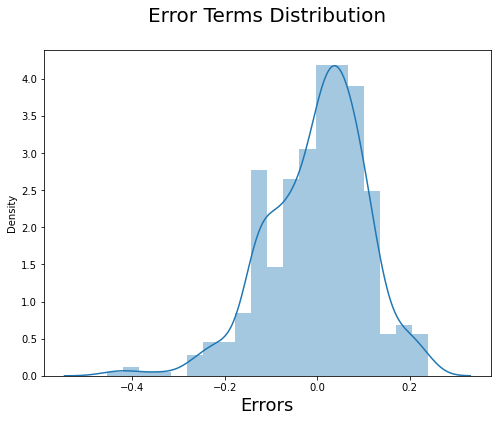

In [82]:
# model 13 error terms distribution plot

plt.figure(figsize=(8,6))
sns.distplot(res, bins = 20)
plt.title('Error Terms Distribution\n', fontsize = 20)            
plt.xlabel('Errors', fontsize = 18)  
plt.show()

####  We can see in histogram that the Error terms are approximately normally distributed which is one of the major assumptions of linear regression.

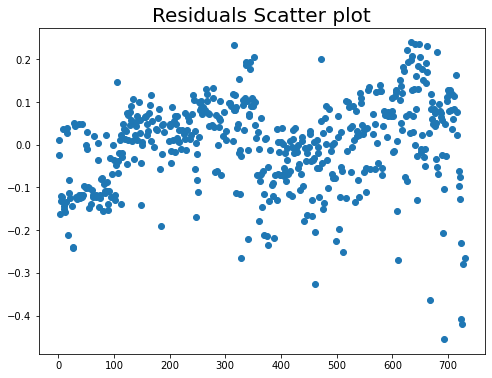

In [83]:
# created a dataframe to plot the residuals against the index value
err = pd.DataFrame(res, columns=['residuals']).reset_index()

# to look for patterns in residuals plotting a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(err['instant'], err['residuals'])
plt.title('Residuals Scatter plot', fontsize = 20)
plt.show()

####  We can see in scatter plot that the residuals seems to be randomly scattered and doesn't show any kind of relationship.

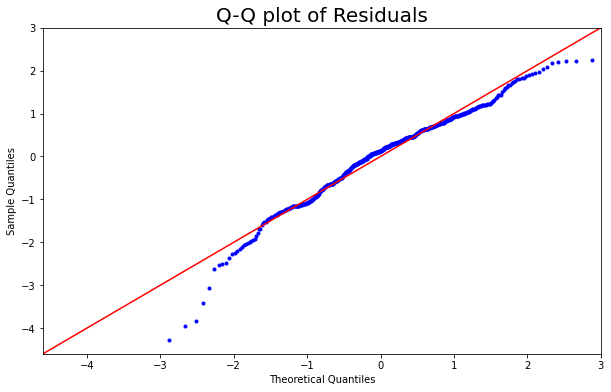

In [106]:
# plotting qqplot of residuals of Model 13

plt.rc("figure", figsize=(10,6))
sm.qqplot(res, fit=True, line='45', marker='.' )

# This can also be used for plotting qqplot
#pp = sm.ProbPlot(test, fit=True)
#qq = pp.qqplot(marker='.', markerfacecolor='b', markeredgecolor='b', alpha=0.5)
#sm.qqline(qq.axes[0], line='45', fmt='k--')

plt.title('Q-Q plot of Residuals', fontsize=20)
plt.show()

In [85]:
# checking R square value using sklearn metrics r2_score

R2 = r2_score(y_train, y_train_pred)
print(f'R2 value for train data: {round(R2,3)}')

# calculating Adjusted R square using formula Adj_R2 = 1-(1-R2)*(n-1)/(n-p-1) where:
# R2 = R square value = 0.796
# n = number of sample size = 510 , p = number of independent variables = 3

Adj_R2 = 1-(1-R2)*(510-1)/(510-3-1)
print(f'Adjusted R2 value for train data: {round(Adj_R2,3)}')

R2 value for train data: 0.796
Adjusted R2 value for train data: 0.795


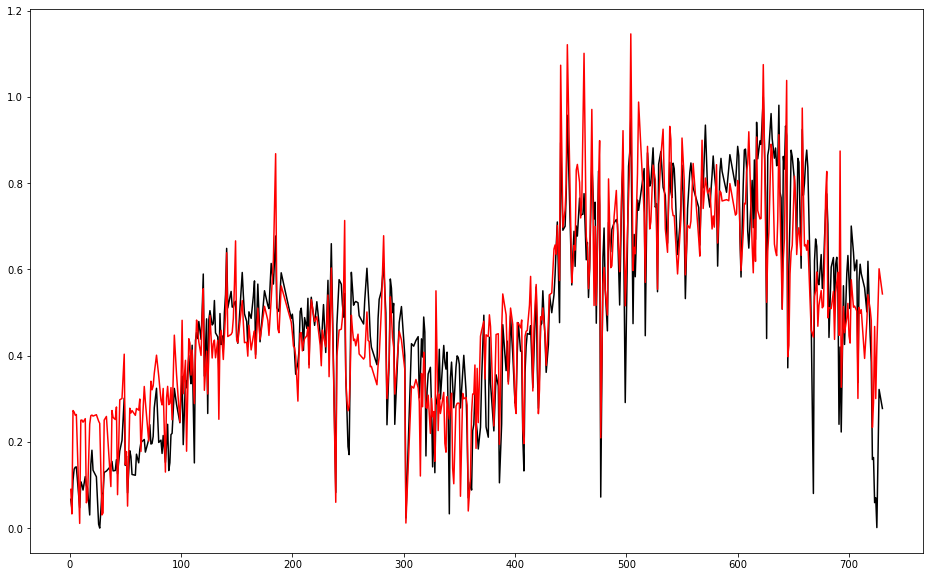

In [86]:
# plotting y train and y predicted to see how it fits the pattern

plt.figure(figsize=(16,10))

plt.plot(y_train.sort_index(), color='black')

plt.plot(y_train_pred.sort_index(), color='red')

plt.show()

### Model 11 - Residual Analysis

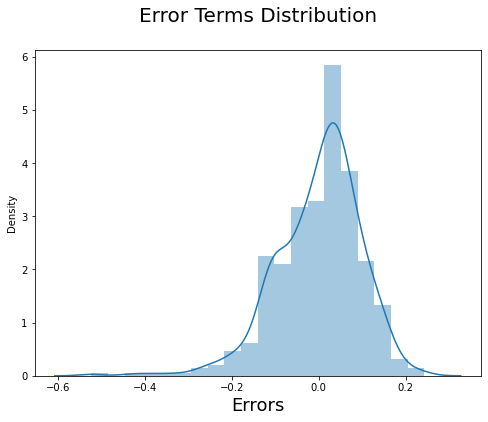

In [87]:
#model 11 prediction
y_train_pred_lr11 = lr_11.predict(X_train_rfe_11)

# model 11 residuals
res_lr11 = y_train - y_train_pred_lr11

# model 11 error terms distribution plot

plt.figure(figsize=(8,6))
sns.distplot(res_lr11, bins = 20)
plt.title('Error Terms Distribution\n', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

####  We can see in histogram that the Error terms are approximately normally distributed which is one of the major assumptions of linear regression.

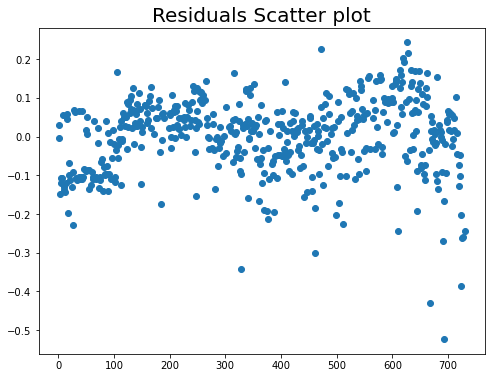

In [88]:
# created a dataframe to plot the residuals against the index value
err_lr11 = pd.DataFrame(res_lr11, columns=['residuals']).reset_index()

# to look for patterns in residuals plotting a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(err_lr11['instant'], err_lr11['residuals'])
plt.title('Residuals Scatter plot', fontsize = 20)
plt.show()

####  We can see in scatter plot that the residuals seems to be randomly scattered and doesn't show any kind of relationship.

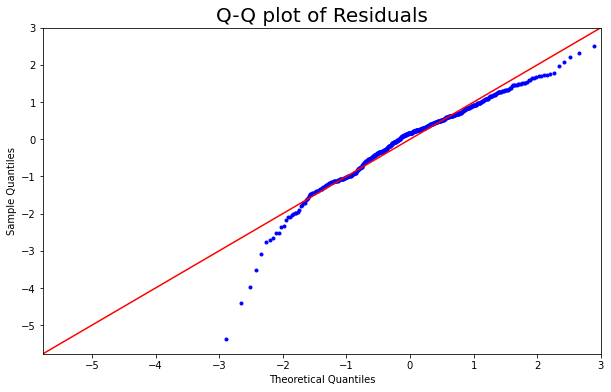

In [105]:
# plotting qqplot of residuals of Model 11

plt.rc("figure", figsize=(10,6))
sm.qqplot(res_lr11, fit=True, line='45', marker='.' )

# This can also be used for plotting qqplot
#pp = sm.ProbPlot(test, fit=True)
#qq = pp.qqplot(marker='.', markerfacecolor='b', markeredgecolor='b', alpha=0.5)
#sm.qqline(qq.axes[0], line='45', fmt='k--')

plt.title('Q-Q plot of Residuals', fontsize=20)
plt.show()

In [90]:
# checking R square value using sklearn metrics r2_score

R2_lr11 = r2_score(y_train, y_train_pred_lr11)
print(f'R2 value for train data: {round(R2_lr11,3)}')

# calculating Adjusted R square using formula Adj_R2 = 1-(1-R2)*(n-1)/(n-p-1) where:
# R2 = R square value = 0.844
# n = number of sample size = 510 , p = number of independent variables = 10

Adj_R2_lr11 = 1-(1-R2_lr11)*(510-1)/(510-5-1)
print(f'Adjusted R2 value for train data: {round(Adj_R2_lr11,3)}')

R2 value for train data: 0.83
Adjusted R2 value for train data: 0.828


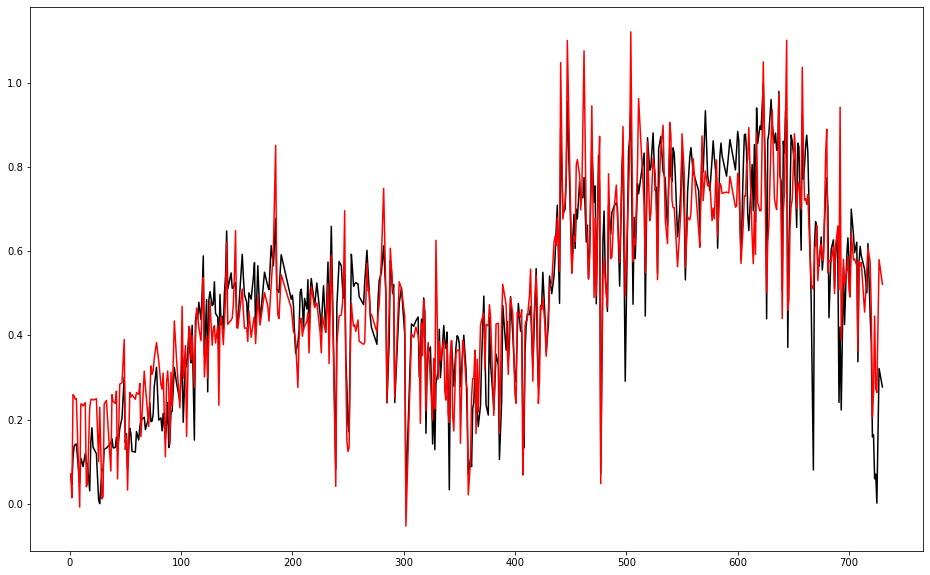

In [91]:
# plotting y train and y predicted to see how it fits the pattern

plt.figure(figsize=(16,10))

plt.plot(y_train.sort_index(), color='black')

plt.plot(y_train_pred_lr11.sort_index(), color='red')

plt.show()

### We can observe that Model 11 residual distribution plot is fitting nicely and explaining all the points perfectly than Model 13 which is also very close. And the scatter plot of Model 11 too shows the residuals nicely scattered but not too scatterd at the end which is in the case of Model 13. We can choose Model 11 as our final model, or we can make the predictions using both of them and see the results.

## 3.4 Making Predictions Using the Model 13 &  Model 11

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [92]:
# we need to first apply scaling on the test dataframe
# applying scaler to all the features columns of test dataframe

feat_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

test_df[feat_vars] = scaler.transform(test_df[feat_vars])

In [93]:
# decsribing the test dataframe to check the scaling effect
test_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_light snow/rain,weathersit_misty
count,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00
mean,0.48,0.02,0.67,0.54,0.52,0.55,0.36,0.26,0.49,0.49,0.25,0.24,0.20,0.11,0.06,0.08,0.08,0.12,0.11,0.09,0.08,0.06,0.09,0.06,0.14,0.14,0.17,0.16,0.13,0.11,0.02,0.32
std,0.50,0.13,0.47,0.25,0.24,0.18,0.15,0.20,0.23,0.23,0.43,0.43,0.40,0.31,0.25,0.27,0.28,0.33,0.31,0.28,0.28,0.24,0.28,0.24,0.34,0.34,0.38,0.36,0.33,0.32,0.13,0.47
min,0.00,0.00,0.00,-0.05,-0.03,-0.24,0.04,-0.00,-0.06,-0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.31,0.32,0.42,0.25,0.10,0.33,0.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,1.00,0.56,0.56,0.56,0.33,0.22,0.49,0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,0.78,0.73,0.68,0.44,0.33,0.66,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,1.00,1.00,1.00,0.98,0.95,0.97,0.86,0.96,1.00,0.93,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [94]:
# dividing the data into independent (X_test) and target (y_test) dataframes for model evaluation

y_test = test_df.pop('cnt')
X_test = test_df

### Model 13 - Predictions

In [95]:
# assigning the required features for 13th model

X_test_lr13 = X_test[['yr', 'workingday', 'casual']]

In [96]:
# Prediction

# adding constant variable to test dataframe
X_test_lr13 = sm.add_constant(X_test_lr13)

# making predictions using the 13th model
y_test_pred = lr_13.predict(X_test_lr13)

In [97]:
# Evaluation

# checking R square value using sklearn metrics r2_score

R2_final = r2_score(y_test, y_test_pred)
print(f'R2 value for test data: {round(R2_final,3)}')

# calculating Adjusted R square using formula Adj_R2 = 1-(1-R2)*(n-1)/(n-p-1) where:
# R2 = R square value = 0.796
# n = number of sample size = 510 , p = number of independent variables = 3

Adj_R2_final = 1-(1-R2_final)*(219-1)/(219-3-1)
print(f'Adjusted R2 value for test data: {round(Adj_R2_final,3)}')

R2 value for test data: 0.81
Adjusted R2 value for test data: 0.807


Text(0, 0.5, 'y_pred')

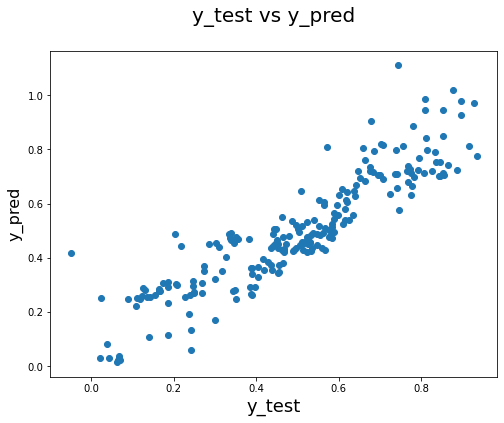

In [98]:
# plotting predicted values against test valuesto see the relationship between them

fig = plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_pred\n', fontsize = 20)        
plt.xlabel('y_test', fontsize = 18)                      
plt.ylabel('y_pred', fontsize = 16)  

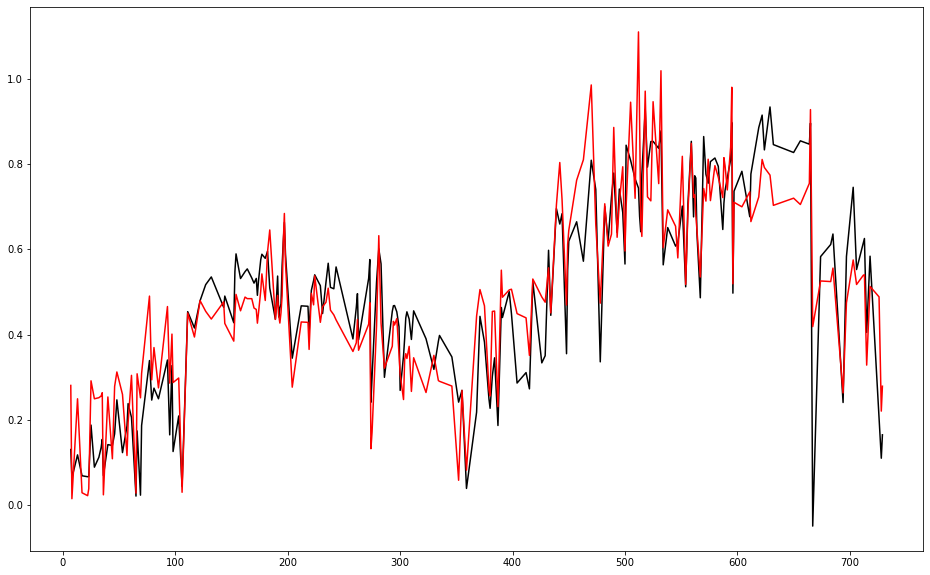

In [99]:
# plotting y test and y predicted to see how it fits the pattern

plt.figure(figsize=(16,10))

plt.plot(y_test.sort_index(), color='black')

plt.plot(y_test_pred.sort_index(), color='red')

plt.show()

### Model 11 - Predictions

In [100]:
# assigning the required features for 11th model

X_test_lr11 = X_test[['yr', 'workingday', 'casual', 'season_winter', 'weathersit_light snow/rain']]

In [101]:
# Prediction

# adding constant variable to test dataframe
X_test_lr11 = sm.add_constant(X_test_lr11)

# making predictions using the 11th model
y_test_pred_lr11 = lr_11.predict(X_test_lr11)

In [102]:
# Evaluation

# checking R square value using sklearn metrics r2_score

R2_final_lr11 = r2_score(y_test, y_test_pred_lr11)
print(f'R2 value for test data: {round(R2_final_lr11,3)}')

# calculating Adjusted R square using formula Adj_R2 = 1-(1-R2)*(n-1)/(n-p-1) where:
# R2 = R square value = 0.796
# n = number of sample size = 510 , p = number of independent variables = 3

Adj_R2_final_lr11 = 1-(1-R2_final_lr11)*(219-1)/(219-5-1)
print(f'Adjusted R2 value for test data: {round(Adj_R2_final_lr11,3)}')

R2 value for test data: 0.846
Adjusted R2 value for test data: 0.842


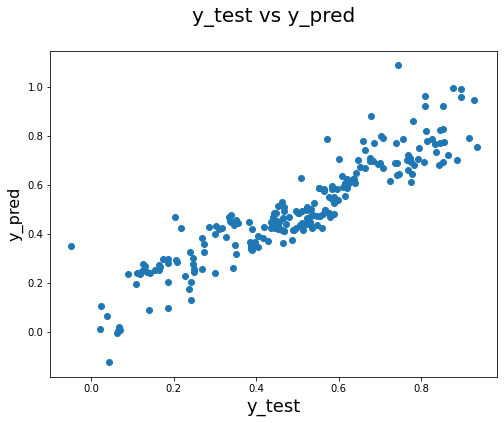

In [103]:
# plotting predicted values against test valuesto see the relationship between them

fig = plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred_lr11)
plt.title('y_test vs y_pred\n', fontsize = 20)        
plt.xlabel('y_test', fontsize = 18)                      
plt.ylabel('y_pred', fontsize = 16)
plt.show()

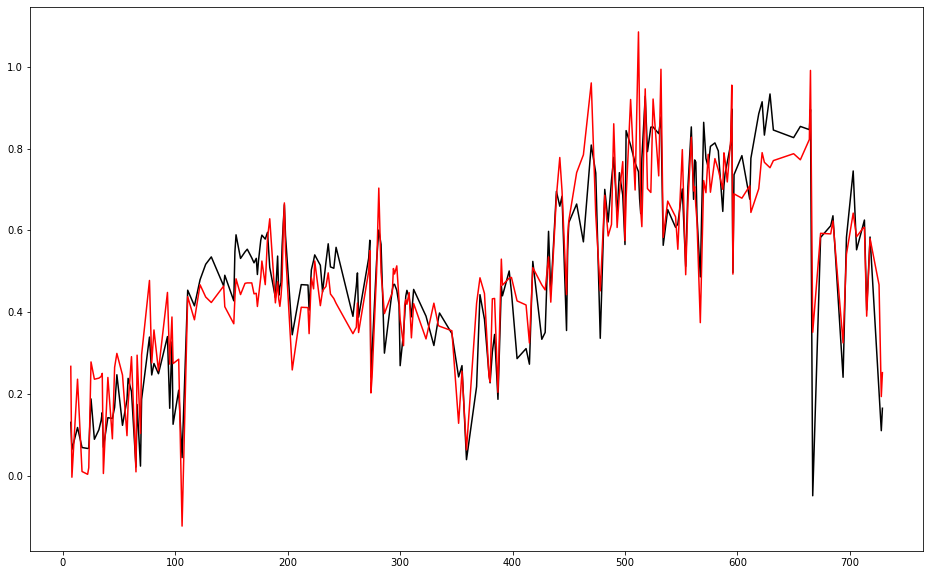

In [104]:
# plotting y test and y predicted to see how it fits the pattern

plt.figure(figsize=(16,10))

plt.plot(y_test.sort_index(), color='black')

plt.plot(y_test_pred_lr11.sort_index(), color='red')

plt.show()

Model 11 line plot is explaining all the points nicely as compared to Model 13 line plot.

### We can see that our predictions Adjusted R2 is much better in case of Model 11 and the scatter plot shows that all the data points are nice packed together in a linear relationship in Model 11.

## We can choose Model 11 as our final model for predictions.

<b>We can see that the equation of our best fitted line is:</b>

$ cnt = - 0.0209 + 0.171 \times yr + 0.2485 \times workingday + 0.9716 \times casual + 0.0886 \times season_winter - 0 .1347 \times weathersit_light snow/rain $